In [1]:
# Panda for reading in csv file
import pandas as pd
# plt for plotting graphs
import matplotlib.pyplot as plt
# Linear regression models
from sklearn.linear_model import LinearRegression
# Neighbour regressor model
from sklearn.neighbors import KNeighborsRegressor
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Neural Network model
from sklearn.neural_network import MLPRegressor
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# GridSearch for hyperparameter turning
from sklearn.model_selection import GridSearchCV
# function for splitting training and testing data
from sklearn.model_selection import train_test_split
# error scores to compare different regression algorithms
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Setup DataFrame
df = pd.read_csv('data/DataEnergyClean.csv')

In [3]:
# Setting up our X for the multidimensional input
X = df.drop(columns='Appliances')
# Setting up the value we want to predict (Appliances, energy use in Wh)
y = df['Appliances']

# Setup the training data (X_train, y_train) which will use 80% of the dataset, 
# and the test data (X_test, y_test) which will use the remaining 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# List of regression models to apply to dataset
models = {"Linear Regression": LinearRegression(n_jobs=-1),
          "Optimized LR": LinearRegression(n_jobs=-1, copy_X=True, fit_intercept=False, positive=False),
          "K-NN": KNeighborsRegressor(n_jobs=-1, algorithm='auto', leaf_size=30, n_neighbors=5, p=2, weights='uniform'),
          "Optimized K-NN": KNeighborsRegressor(n_jobs=-1, algorithm='auto', leaf_size=15, n_neighbors=5, p=1, weights='distance'),
          "NN": MLPRegressor(),
          "Optimized NN": MLPRegressor(activation='relu', alpha=0.001, batch_size=64, early_stopping=False, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, solver='adam'),
          "Logistic Regression": LogisticRegression(C=1.0, penalty='l1', multi_class='auto', solver='saga'),
          "Decision Tree Regressor": DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5),
}


In [8]:
# Checking each model
model_mse_score = []
model_mae_score = []
model_r2_score = []

for model in models:
    print(f"Executing {model}...")

    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_mse_score.append(mse)
    model_mae_score.append(mae)
    model_r2_score.append(r2)

Executing Linear Regression...
Executing Optimized LR...
Executing K-NN...
Executing Optimized K-NN...
Executing NN...


c:\Users\Matt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Executing Optimized NN...
Executing Logistic Regression...


c:\Users\Matt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Executing Decision Tree Regressor...


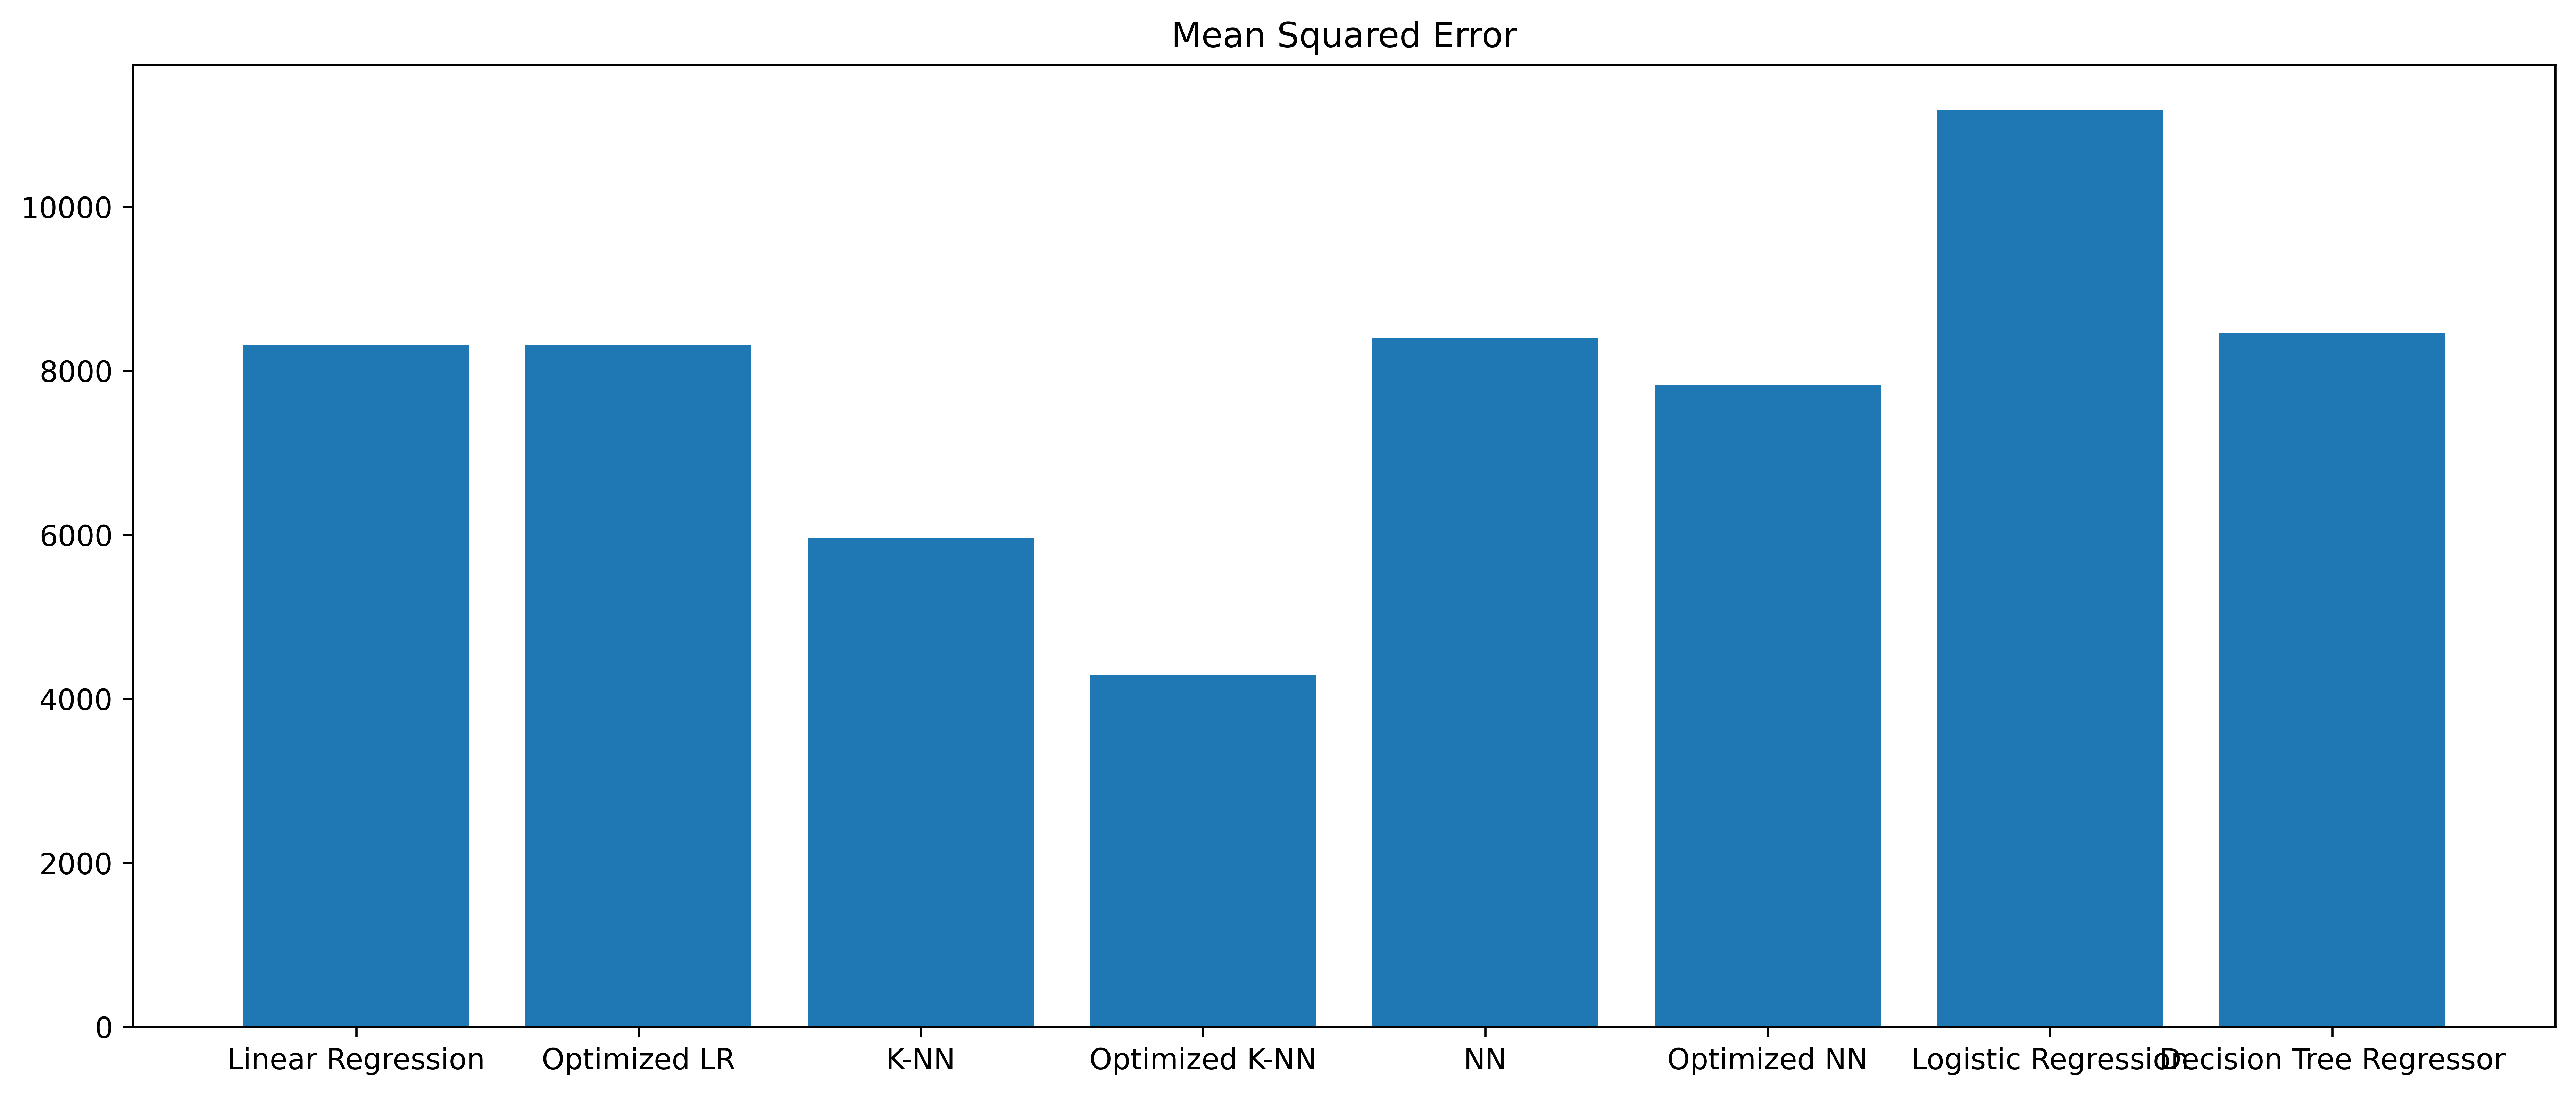

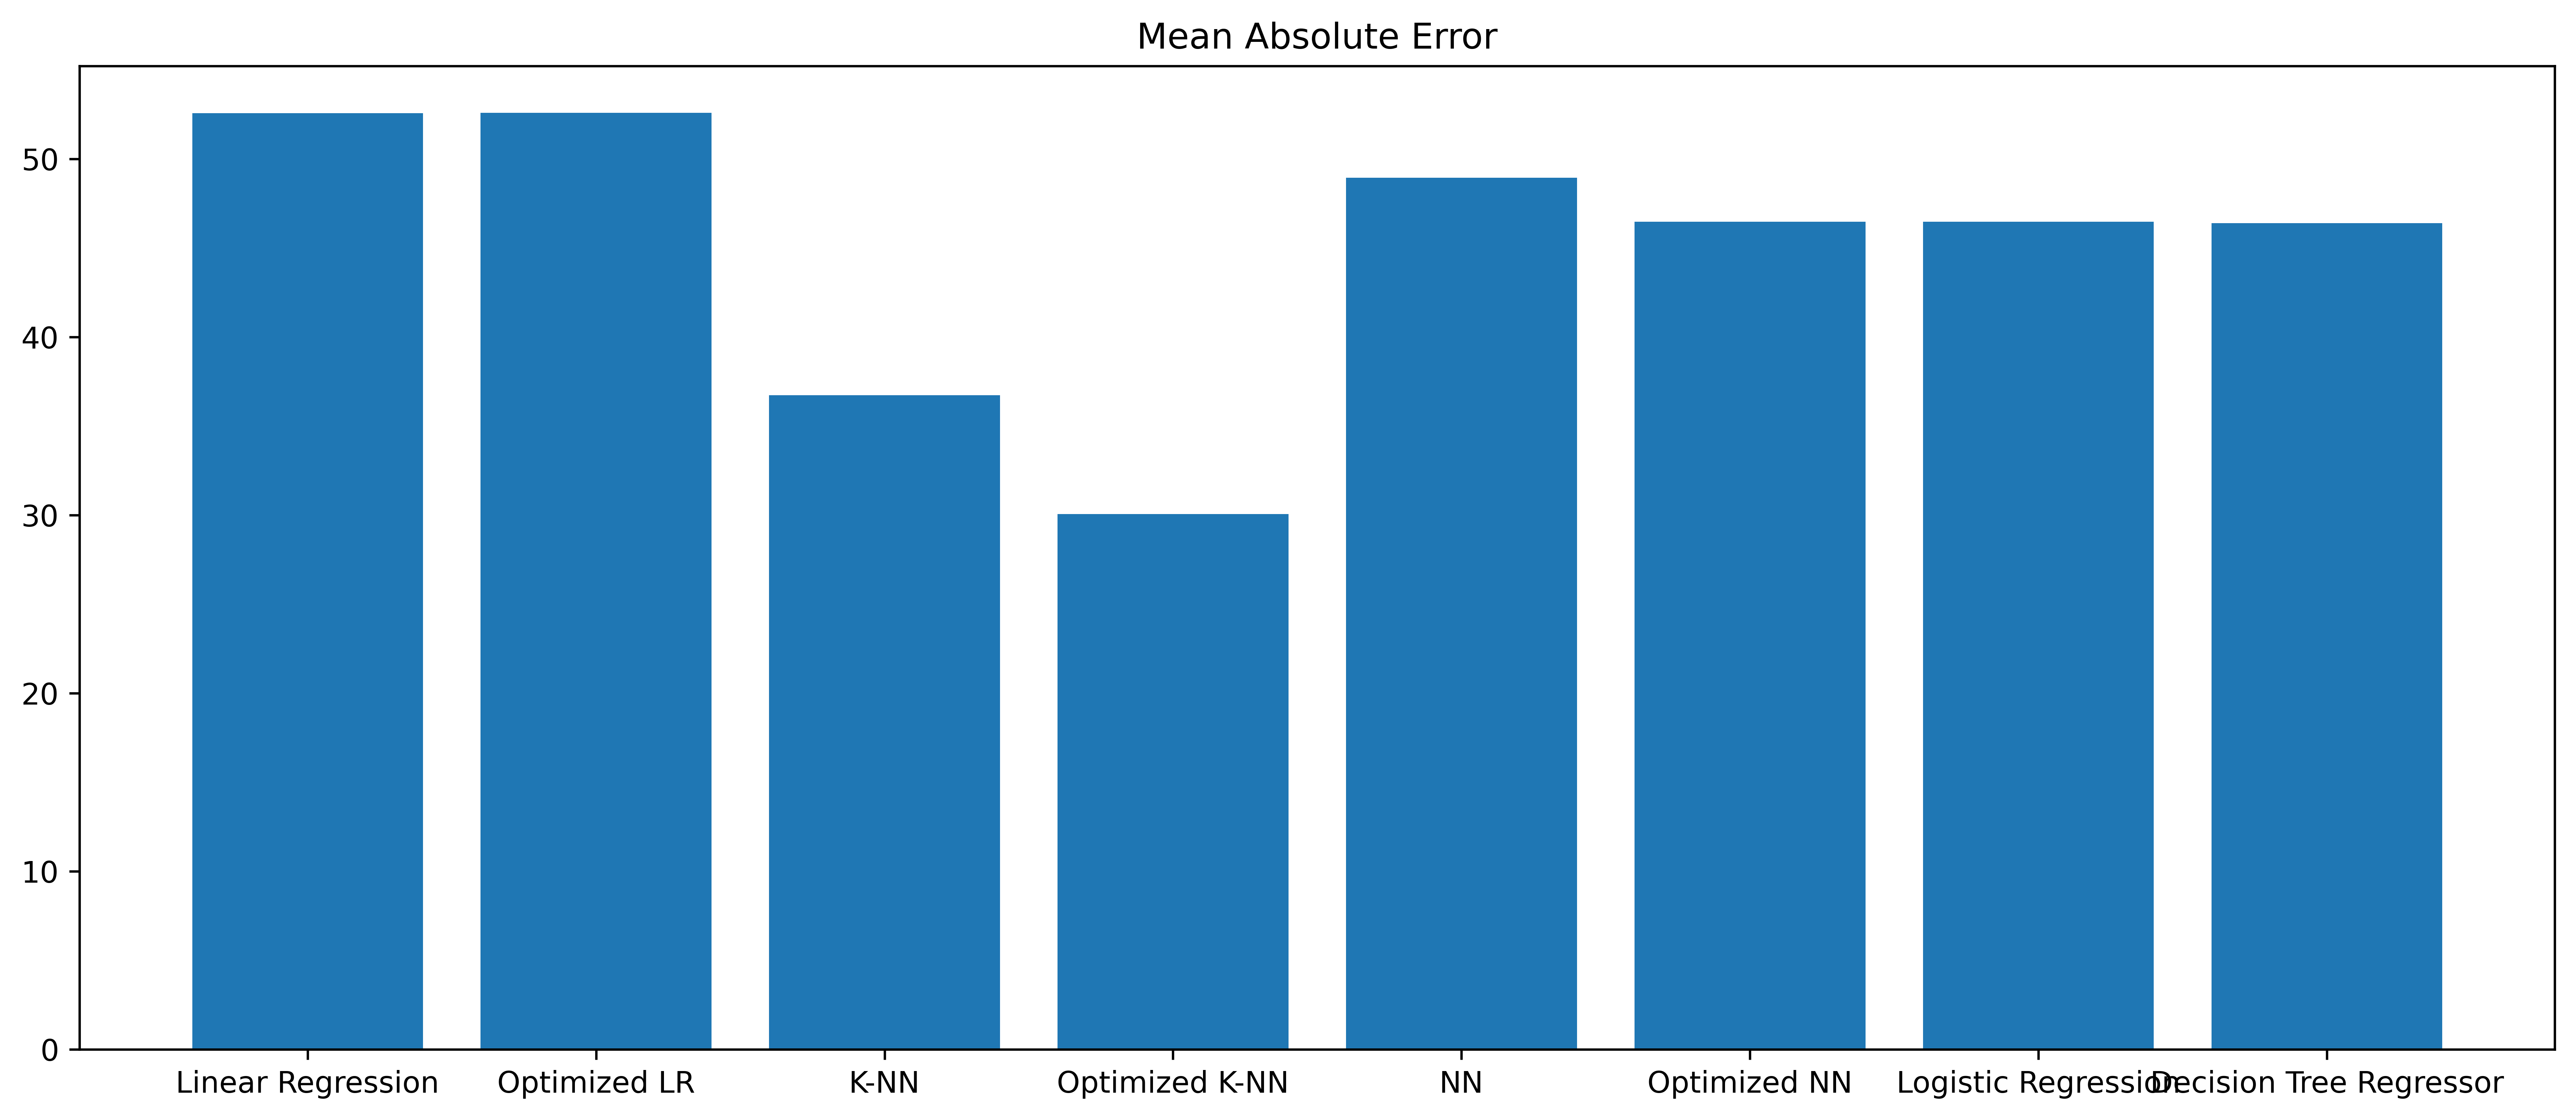

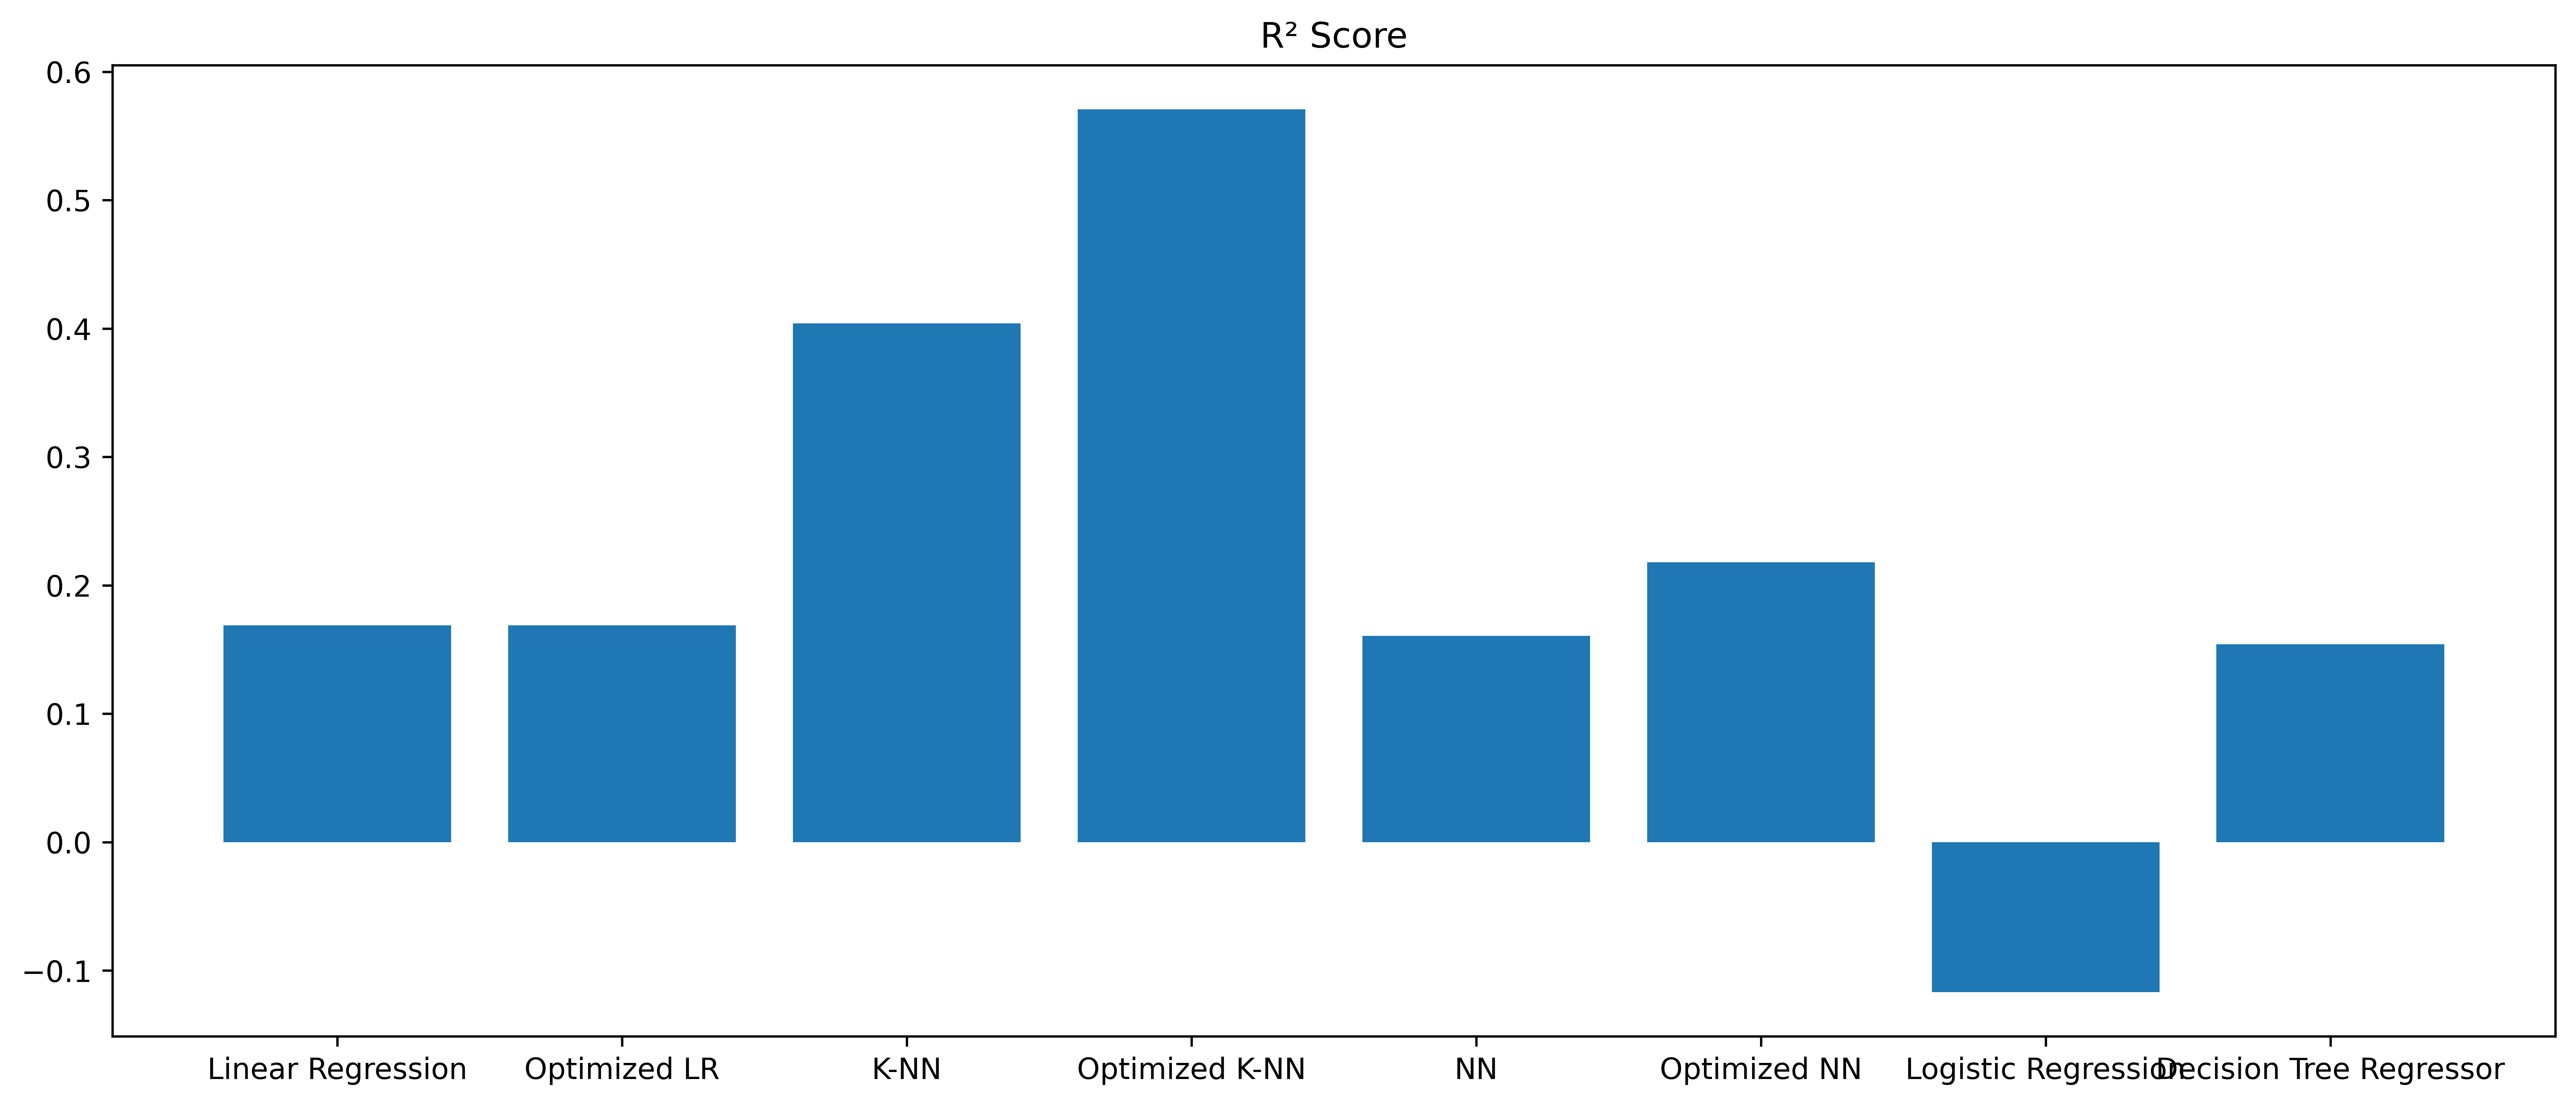

In [9]:
# Show how models measure up against each other
fig1, ax1 = plt.subplots(figsize=(15, 6), dpi=600)
ax1.bar(models.keys(), model_mse_score)
ax1.set_title('Mean Squared Error')
plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 6), dpi=600)
ax2.bar(models.keys(), model_mae_score)
ax2.set_title('Mean Absolute Error')
plt.show()

fig3, ax3 = plt.subplots(figsize=(15, 6), dpi=600)
ax3.bar(models.keys(), model_r2_score)
ax3.set_title('R² Score')
plt.show()